In [479]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os

In [480]:
# Cargar el DataFrame desde el archivo
with open('../Pickles/df_final.pickle', 'rb') as archivo:
    df = pickle.load(archivo)

In [481]:
# Establecer la opción para mostrar todas las columnas
pd.set_option('display.max_columns', None)

Antes de empezr a trabajar, reemplazo los Nan por 0. 

Los Nan surgen del concat de los dos df. 

In [482]:
# Reemplazar todos los NaN con 0
df.fillna(0, inplace=True)

Divido x e y para hacer train_test_split

In [483]:
y = df['CompTotal']

In [484]:
df = df.drop(columns=['CompTotal'], axis=1).copy()

# Siguintes pasos:
1. Exploración y Análisis de Datos (EDA - Exploratory Data Analysis)

a) Estadística Descriptiva:

In [485]:
df.describe()

,MainBranch,CodingActivities,EdLevel,LearnCode,YearsCode,YearsCodePro,OrgSize,PurchaseInfluence,AISelect,AISent,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Age_18-24 years old,Age_25-34 years old,Age_35-44 years old,Age_45-54 years old,Age_55-64 years old,Age_65 years or older,Age_Under 18 years old,employment_map,"RemoteWork_Hybrid (some remote, some in-person)",RemoteWork_In-person,RemoteWork_Remote,LearnCodeOnline_Category_Technical_Reference,LearnCodeOnline_Category_Visual_Interactive,DevType_Category_Desarrollo de Software,DevType_Category_Gestión y Liderazgo,DevType_Category_Hardware y Blockchain,DevType_Category_Infraestructura y Sistemas,DevType_Category_Ingeniería de Datos y Ciencia de Datos,DevType_Category_Investigación y Educación,DevType_Category_Roles de Soporte y Otros,Android-based,Linux-based,MacOS,Otros,Windows-based,Industry_Category_Industria y Energía,Industry_Category_Otros Servicios,Industry_Category_Salud y Educación,Industry_Category_Servicios Financieros,Industry_Category_Tecnología y Servicios Digitales,AIAcc,AIComplex,AIThreat,Age_Prefer not to say
count,1934.000000,1934.000000,1934.000000,1934.000000,1934.000000,1934.000000,1934.000000,1934.000000,1934.000000,1934.000000,1934.000000,1934.000000,1934.000000,1934.000000,1934.000000,1934.000000,1934.000000,1934.000000,1934.000000,1934.000000,1934.000000,1934.000000,1934.000000,1934.000000,1934.000000,1934.000000,1934.000000,1934.000000,1934.000000,1934.000000,1934.000000,1934.000000,1934.000000,1934.000000,1934.000000,1934.000000,1934.000000,1934.000000,1934.000000,1934.000000,1934.000000,1934.000000,1934.000000,1934.000000,1934.000000,1934.000000,1934.00000,1934.000000,1934.000000
mean,4.920889,0.431231,3.925026,7.416236,15.534126,10.841262,3.039297,0.719235,1.298345,3.016029,0.245605,0.685626,0.277146,0.946225,0.647363,0.091520,0.405377,0.350569,0.124612,0.023785,0.002585,0.001034,1.061789,0.342813,0.100827,0.555326,0.001034,0.227508,0.734230,0.051189,0.007239,0.056360,0.047053,0.051706,0.030507,0.086350,0.416236,0.379007,0.095657,0.435367,0.053257,0.099793,0.052740,0.047053,0.312823,0.435884,0.33092,0.222854,0.000517
std,0.269981,1.965606,1.517978,3.605188,9.346391,8.102814,2.440287,0.746970,0.844585,1.939662,1.050297,1.491285,1.159644,1.590584,1.446673,0.288422,0.491092,0.477272,0.330364,0.152418,0.050793,0.032150,0.256691,0.474772,0.301178,0.497058,0.032150,0.419331,0.441857,0.220441,0.084795,0.230675,0.211806,0.221491,0.172021,0.280952,0.493061,0.485265,0.294196,0.495933,0.224605,0.299802,0.223573,0.211806,0.463763,1.180447,1.05518,0.496730,0.022739
min,4.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.00000,0.000000,0.000000
25%,5.000000,-1.000000,3.000000,5.000000,8.000000,4.000000,1.000000,0.000000,1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,5.000000,-1.000000,4.000000,7.000000,14.000000,9.000000,3.000000,1.000000,2.000000,4.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,5.000000,2.000000,5.000000,10.000000,20.000000

<!-- b) Visualización de Datos:

Histogramas: df['columna'].hist() para visualizar la distribución de cada columna.
Diagramas de caja (Boxplots): df.boxplot(column='columna') para visualizar la distribución y detectar outliers.
Gráficos de dispersión (Scatter plots): df.plot.scatter(x='columna1', y='columna2') para visualizar la relación entre dos variables.

2. Análisis de Correlación: elegir de qué columnas, ya que son demasiadas para hacer un heatmap de todas 

Matriz de Correlación: Calcula la correlación entre todas las variables numéricas. Esto te ayuda a entender las relaciones lineales entre ellas.

df.corr(): Calcula la matriz de correlación.
Mapa de Calor (Heatmap): Visualiza la matriz de correlación para una interpretación más fácil. -->

Divido en train y test y escalo

In [486]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(df,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [487]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Posibles modelos para mi problema de **regresión**:

- Regresión Lineal
- Ridge Regression
- Lasso Regression
- Elastic Net
- Support Vector Regression (SVR)
- Árboles de Decisión (Decision Trees)
- Random Forest
- Gradient Boosting (XGBoost, LightGBM, CatBoost)

Tiro un primer baseline con Lineal regression

In [488]:
# from sklearn.linear_model import LinearRegression
# linear_reg = LinearRegression()
# linear_reg.fit(X_train, y_train)

In [489]:
# y_pred = linear_reg.predict(X_test)

In [490]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# mse = mean_squared_error(y_test, y_pred)
# rmse = mean_squared_error(y_test, y_pred)  
# mae = mean_absolute_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print(f"MSE: {mse:.2f}")
# print(f"RMSE: {rmse:.2f}")
# print(f"MAE: {mae:.2f}")
# print(f"R²: {r2:.2f}")

Estas métricas indican que el modelo de Regresión lineal no es un buen modelo para este dataset. Probablemente los datos no tengan relaciones lineales, por lo que probaré con RandomForestRegressor para utilizar éste como baseline. 

In [491]:
from sklearn.ensemble import RandomForestRegressor

In [492]:
# # Crear un modelo de Random Forest
# rf_model = RandomForestRegressor(random_state=42)

# # Entrenar el modelo
# rf_model.fit(X_train, y_train)

# # Hacer predicciones sobre el conjunto de prueba
# y_pred = rf_model.predict(X_test)

In [493]:
# # Calcular las métricas de evaluación
# mse = mean_squared_error(y_test, y_pred)
# rmse = mean_squared_error(y_test, y_pred)
# mae = mean_absolute_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print(f"MSE: {mse:.2f}")
# print(f"RMSE: {rmse:.2f}")
# print(f"MAE: {mae:.2f}")
# print(f"R²: {r2:.2f}")

Ya tengo mi primer baseline, con unas métricas bastante malas, pero mejores que las que obtenía con un LinearRegressor. 

Seguré ajustando Hiperparámetros: con GridSearchCV optimizaré

- n_estimators (número de árboles)
- max_depth (profundidad máxima de los árboles)
- min_samples_split (número mínimo de muestras para dividir un nodo)
- min_samples_leaf (número mínimo de muestras en una hoja)
- max_features (número de características a considerar en cada división)

In [494]:
from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
# grid_search.fit(X_train, y_train)                                                      

# print("Mejores hiperparámetros:", grid_search.best_params_)
# best_rf_model = grid_search.best_estimator_

# # Evaluar el mejor modelo
# y_pred = best_rf_model.predict(X_test)

In [495]:
# # Calcular las métricas de evaluación
# mse = mean_squared_error(y_test, y_pred)
# rmse = mean_squared_error(y_test, y_pred)
# mae = mean_absolute_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print(f"MSE: {mse:.2f}")
# print(f"RMSE: {rmse:.2f}")
# print(f"MAE: {mae:.2f}")
# print(f"R²: {r2:.2f}")

Las métricas mejoran, pero sigue quedando mucho margen de mejora para el modelo. Probaré con varios modelos de Boosting: 
- Gradient Boosting (XGBoost, LightGBM, CatBoost)

In [496]:
from sklearn.ensemble import GradientBoostingRegressor
# # Crear un modelo de Random Forest
# gbr_model = GradientBoostingRegressor(random_state=42)

# # Entrenar el modelo
# gbr_model.fit(X_train, y_train)

# # Hacer predicciones sobre el conjunto de prueba
# y_pred = gbr_model.predict(X_test)

In [497]:
# # Calcular las métricas de evaluación
# mse = mean_squared_error(y_test, y_pred)
# rmse = mean_squared_error(y_test, y_pred)
# mae = mean_absolute_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print(f"MSE: {mse:.2f}")
# print(f"RMSE: {rmse:.2f}")
# print(f"MAE: {mae:.2f}")
# print(f"R²: {r2:.2f}")

Pruebo con XGBoost Regressor

In [498]:
# !pip install xgboost

In [499]:
import xgboost as xgb
# # Crear un modelo de XGBoost Regressor
# xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)  # objective es importante para problemas de regresión

# # Entrenar el modelo
# xgb_model.fit(X_train, y_train)

# # Hacer predicciones sobre el conjunto de prueba
# y_pred = xgb_model.predict(X_test)

# # Calcular las métricas de evaluación
# mse = mean_squared_error(y_test, y_pred)
# rmse = mean_squared_error(y_test, y_pred)
# mae = mean_absolute_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print(f"MSE: {mse:.2f}")
# print(f"RMSE: {rmse:.2f}")
# print(f"MAE: {mae:.2f}")
# print(f"R²: {r2:.2f}")

Sigue mejorando el r2, pero aun no lo óptimo:

In [500]:
# param_grid = {
#     'max_depth': [3, 4, 5, 6],
#     'learning_rate': [0.01, 0.05, 0.1],
#     'n_estimators': [100, 200, 300],
#     'colsample_bytree': [0.7, 0.8, 0.9],
#     'subsample': [0.7, 0.8, 0.9],
# }

# grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
# grid_search.fit(X_train, y_train)

# print("Mejores hiperparámetros:", grid_search.best_params_)
# best_xgb_model = grid_search.best_estimator_

# # Evaluar el mejor modelo
# y_pred = best_xgb_model.predict(X_test)                   

In [501]:
# # Calcular las métricas de evaluación
# mse = mean_squared_error(y_test, y_pred)
# rmse = mean_squared_error(y_test, y_pred)
# mae = mean_absolute_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print(f"MSE: {mse:.2f}")
# print(f"RMSE: {rmse:.2f}")
# print(f"MAE: {mae:.2f}")
# print(f"R²: {r2:.2f}")

In [502]:
# best_xgb_model.feature_importances_

### Modelo de Machine Learning: Selección y Ajuste

Tras un análisis exploratorio inicial, se procedió a entrenar y evaluar diversos modelos de machine learning para la predicción de salarios. Se probaron inicialmente modelos de regresión lineal y polinomial, y posteriormente modelos más complejos como Random Forest y XGBoost. Si bien los modelos más avanzados, como Random Forest y XGBoost, mostraron una mejora en las métricas de evaluación con respecto a los modelos lineales, el rendimiento general no alcanzó los niveles deseados, evidenciado por un R² que, si bien positivo, se mantuvo por debajo de valores que indicaran un ajuste óptimo.

Un análisis detallado de las métricas y la distribución de los salarios sugirió que la dispersión de los datos podría estar dificultando la capacidad de los modelos para capturar patrones y relaciones subyacentes. La distribución de salarios presenta una asimetría positiva, con una concentración significativa de valores en el rango inferior y una cola extendida hacia valores más altos, que se corresponde a una minoría de casos. El análisis exploratorio de la variable objetivo ('target'), que representa el salario anual, reveló una dispersión considerable de los datos:

In [503]:
y.describe() 

count      1934.000000
mean      56435.776112
std       38530.368156
min        7500.000000
25%       33402.500000
50%       48000.000000
75%       67000.000000
max      400000.000000
Name: CompTotal, dtype: float64

El gráfico de la distribución de la variable objetivo muestra también una clara asimetría, con una concentración de valores en el rango inferior y una cola extendida hacia valores más altos.

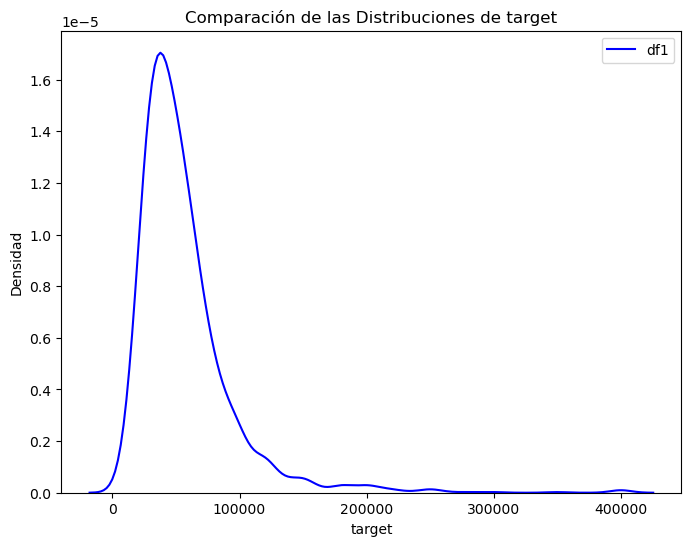

In [504]:
# Visualización
plt.figure(figsize=(8, 6))
sns.kdeplot(y, label='df1', color='blue')
plt.title('Comparación de las Distribuciones de target')
plt.xlabel('target')
plt.ylabel('Densidad')
plt.legend()
plt.show()

Esta configuración plantea un desafío para los modelos de *machine learning*, que pueden tener dificultades para generalizar a partir de datos tan heterogéneos.

#### Estrategia de Modelado con Dos Grupos

En vista de la dispersión observada y del análisis de la distribución de los datos, se decidió implementar una estrategia de modelado diferenciada, que consiste en la creación de dos modelos distintos. El primero se enfoca en el subconjunto de datos que corresponde a salarios que se consideran dentro de un rango "normal" o más frecuente, mientras que el segundo modelo se entrena con los datos correspondientes a salarios significativamente más altos, que podrían considerarse atípicos en comparación con el grueso de la distribución. La hipótesis subyacente es que los factores que determinan los salarios en estos dos rangos pueden ser diferentes y, por lo tanto, requieren modelos distintos para su correcta predicción.

**Metodología para la División en Grupos**

Para segmentar el conjunto de datos en dos grupos, se evaluaron varios métodos:

- *Umbral Fijo*: Establecer un límite arbitrario, como por ejemplo, 100,000 unidades monetarias. Este método es directo, pero carece de fundamentación estadística y depende de una elección discrecional.
- *Percentiles*: Dividir los datos basándose en percentiles, ajustando el punto de corte (por ejemplo, percentil 90, 85, etc.) para optimizar la distribución resultante. Este enfoque es adaptable, pero la elección del percentil sigue siendo, en cierta medida, arbitraria.
- *Desviación Estándar*: Clasificar como "salarios altos" aquellos que se sitúan a 2 o 3 desviaciones estándar por encima de la media. Este método se basa en la dispersión de los datos, pero asume una distribución aproximadamente normal, lo cual no se cumple estrictamente en este - caso.
- *Clustering*: Aplicar un algoritmo de clustering para identificar agrupaciones naturales en los datos, permitiendo que el propio algoritmo determine los límites entre los grupos basándose en la similitud de los salarios.
Implementación del Clustering para la Segmentación

Se optó por implementar la técnica de clustering mediante el algoritmo K-Means para segmentar los datos. Para ello, se seleccionó la columna de salarios del DataFrame y se escalaron los datos utilizando StandardScaler para asegurar que la magnitud de los salarios no influyera de manera desproporcionada en el proceso de clustering.

In [505]:
from sklearn.cluster import KMeans

Tengo que cargar los datos nuevamente, porque antes estaban escalados 

In [506]:
# Cargar el DataFrame desde el archivo
with open('../Pickles/df_final.pickle', 'rb') as archivo:
    df = pickle.load(archivo)

In [507]:
# Reemplazar todos los NaN con 0
df.fillna(0, inplace=True)

## Segmentación de Datos mediante Clustering

El objetivo de esta segmentación es mejorar la capacidad predictiva de los modelos de machine learning al permitirles aprender patrones específicos de cada grupo.

Metodología de Clustering

Se empleó el algoritmo K-Means para la segmentación de los datos, utilizando la variable CompTotal (salario anual total) como base para la agrupación. Se realizaron pruebas iniciales con dos clústeres, con la intención de separar los datos en grupos de salarios "normales" y "altos". Sin embargo, el análisis de la distribución resultante reveló que un clúster capturaba la gran mayoría de los datos, mientras que el otro agrupaba una cantidad reducida de observaciones con salarios significativamente más elevados.

Para refinar la segmentación, se incrementó el número de clústeres a cuatro en el algoritmo K-Means. La visualización de los cuatro clústeres resultantes, mediante el histograma que muestro a continuación, mostró una separación más clara y detallada de los datos en función del salario.

In [508]:
y = df[['CompTotal']].copy()  # 'y' ahora contiene la variable objetivo

# Escalar los datos (en este caso, solo la columna de salarios)
scaler = StandardScaler()
y_scaled = scaler.fit_transform(y) # 'y_scaled' contiene los salarios escalados

# Aplicar K-Means con 2 clústeres
kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')
kmeans.fit(y_scaled)

# Obtener las etiquetas de los clústeres
labels = kmeans.labels_

# Agregar las etiquetas al DataFrame original
df['cluster'] = labels

# Separar los grupos
df_cluster_0 = df[df['cluster'] == 0]
df_cluster_1 = df[df['cluster'] == 1]
df_cluster_2 = df[df['cluster'] == 2]
df_cluster_3 = df[df['cluster'] == 3]

Histograma de la distribución de salarios para los cuatro clústeres generados por K-Means.

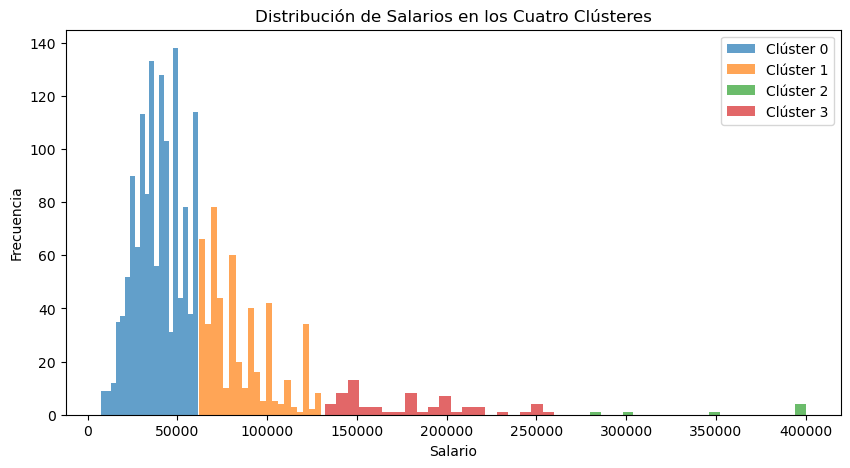

In [509]:
# Histograma de los dos grupos
plt.figure(figsize=(10, 5))
plt.hist(df_cluster_0['CompTotal'], bins=20, alpha=0.7, label='Clúster 0')
plt.hist(df_cluster_1['CompTotal'], bins=20, alpha=0.7, label='Clúster 1')
plt.hist(df_cluster_2['CompTotal'], bins=20, alpha=0.7, label='Clúster 2')
plt.hist(df_cluster_3['CompTotal'], bins=20, alpha=0.7, label='Clúster 3')
plt.xlabel("Salario")
plt.ylabel("Frecuencia")
plt.title("Distribución de Salarios en los Cuatro Clústeres")
plt.legend()
plt.show()

### Análisis de los Clústeres Resultantes

El clúster 0 concentra la mayor parte de las observaciones (1791) y presenta una distribución de salarios sesgada a la derecha, con valores que van desde aproximadamente 0 hasta 60,000. Los clústeres 1, 2 y 3, en cambio, agrupan una cantidad menor de observaciones, con rangos de salarios progresivamente más altos. El clúster 1 contiene salarios intermedios (aproximadamente entre 60,000 y 100,000), el clúster 2 agrupa salarios más altos (entre 125,000 y 200,000), y el clúster 3 representa los salarios más elevados del conjunto de datos (por encima de 350,000).

### Agrupación de Clústeres

Con el fin de mantener la estrategia inicial de modelar dos grupos diferenciados (salarios "normales" y "altos") y, al mismo tiempo, obtener un grupo de "salarios altos" con un tamaño de muestra más adecuado para el entrenamiento de modelos, se decidió agrupar los clústeres 1, 2 y 3 en un solo clúster. Esta agrupación se justifica por las siguientes razones: 1. Simplicidad: Facilita el análisis y la comparación de modelos al mantener la dicotomía inicial entre salarios "normales" y "altos".
2. Tamaño de Muestra: El grupo resultante de la unión de los clústeres 1, 2 y 3 tiene un tamaño de muestra combinado que, si bien es menor que el del clúster 0, es más adecuado para el entrenamiento de modelos que los clústeres individuales por separado.
3. Diferenciación Clara: A pesar de la agrupación, la diferencia entre el clúster 0 y el nuevo clúster "alto" (1+2+3) sigue siendo significativa en términos de rango salarial.

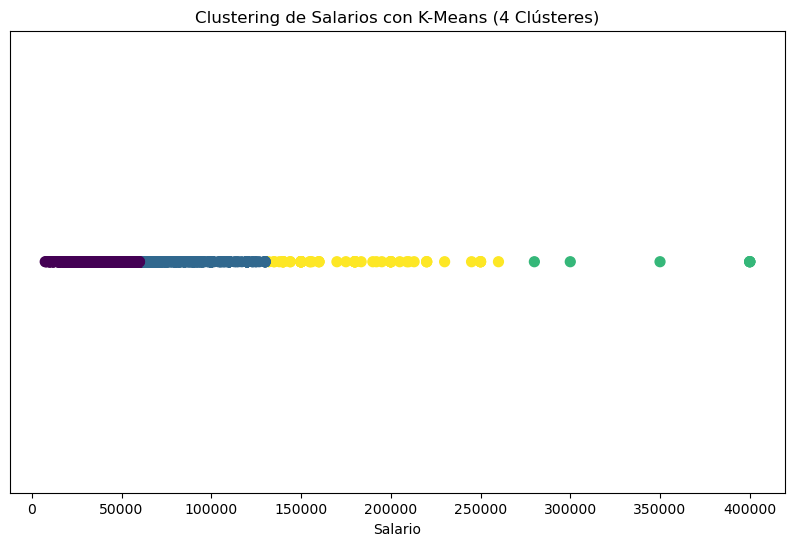

In [510]:
# Visualizar los clústeres
plt.figure(figsize=(10, 6))
plt.scatter(df['CompTotal'], [0] * len(df), c=df['cluster'], cmap='viridis', s=50)
plt.xlabel("Salario")
plt.title("Clustering de Salarios con K-Means (4 Clústeres)")
plt.yticks([])  # Ocultar el eje y
plt.show()

In [511]:
# --- Agrupar clústeres 1, 2 y 3 ---
df['cluster_grouped'] = df['cluster'].map({0: 0, 1: 1, 2: 1, 3: 1})

# Separar los grupos
df_cluster_0 = df[df['cluster_grouped'] == 0]
df_cluster_1 = df[df['cluster_grouped'] == 1]

#### Análisis del Clúster 0 (Salarios "Normales")

El clúster 0, que representa el grupo de salarios "normales", contiene 1366 observaciones. La Figura a continuación muestra la distribución de los salarios en este clúster, y la Tabla que le sigue presenta las estadísticas descriptivas correspondientes.

In [512]:
from sklearn.preprocessing import PolynomialFeatures
# # --- Clúster 0 ---
# # Separar la variable objetivo (y) de las variables predictoras (X)
# y_c0 = df_cluster_0['CompTotal']
# X_c0 = df_cluster_0.drop(['CompTotal', 'cluster', 'cluster_grouped'], axis=1)  # Eliminar también las columnas de clustering

In [513]:
# # Visualización
# plt.figure(figsize=(8, 6))
# sns.kdeplot(y_c0, label='Cluster0', color='blue')
# plt.title('Comparación de las Distribuciones de target')
# plt.xlabel('target')
# plt.ylabel('Densidad')
# plt.legend()
# plt.show()

Como se puede apreciar, la distribución de los salarios en el clúster 0 es unimodal y presenta una asimetría positiva, aunque mucho menos pronunciada que la distribución original del conjunto de datos completo. La media y la mediana son muy similares (39,109 y 39,000, respectivamente), lo que indica una distribución relativamente simétrica. El rango de salarios en este grupo (de 7,500 a 61,200) se considera adecuado para representar el segmento de salarios "normales" o más frecuentes dentro de la industria tecnológica, de acuerdo con el contexto del estudio.

In [514]:
# y_c0.describe()

In [515]:
# # Dividir en entrenamiento y prueba
# X_train_c0, X_test_c0, y_train_c0, y_test_c0 = train_test_split(
#     X_c0, y_c0, test_size=0.2, random_state=42
# )

# # Transformación logarítmica de la variable objetivo
# y_train_c0_log = np.log1p(y_train_c0)

# # Visualizacion con transformacion logaritmica
# # Visualización
# plt.figure(figsize=(8, 6))
# sns.kdeplot(y_train_c0_log, label='Cluster0', color='blue')
# plt.title('Comparación de las Distribuciones de target')
# plt.xlabel('target')
# plt.ylabel('Densidad')
# plt.legend()
# plt.show()

In [516]:
# # Creacion de variables polinomicas
# poly = PolynomialFeatures(degree=2, include_bias=False)
# X_train_c0_poly = poly.fit_transform(X_train_c0)
# X_test_c0_poly = poly.transform(X_test_c0)

# # Escalar las variables predictoras
# scaler_c0 = StandardScaler()
# X_train_c0_scaled = scaler_c0.fit_transform(X_train_c0_poly)
# X_test_c0_scaled = scaler_c0.transform(X_test_c0_poly)

In [517]:
# print((X_train_c0).shape)
# print((X_test_c0).shape)
# print((y_train_c0).shape)
# print((y_test_c0).shape)

#### Análisis del Clúster 1 (Salarios "Altos")

In [518]:
# # --- Clúster 1+2+3 ---
# # Separar la variable objetivo (y) de las variables predictoras (X)
# y_c1 = df_cluster_1['CompTotal']
# X_c1 = df_cluster_1.drop(['CompTotal', 'cluster', 'cluster_grouped'], axis=1)

# y_c1.describe()

El clúster 1, que representa el segmento de salarios 'altos', se compone de 568 observaciones. La distribución de los salarios en este grupo, como se observa en la Figura que sigue y se resume en la Tabla de arriba, es asimétrica positiva, con una media de 98,105 y una desviación estándar de 47,070. La presencia de valores atípicamente altos, como lo indica el salario máximo de 400,000, es una característica distintiva de este grupo.

In [519]:
# # Visualización
# plt.figure(figsize=(8, 6))
# sns.kdeplot(y_c1, label='Cluster0', color='blue')
# plt.title('Comparación de las Distribuciones de target')
# plt.xlabel('target')
# plt.ylabel('Densidad')
# plt.legend()
# plt.show()

In [520]:
# # Dividir en entrenamiento y prueba
# X_train_c1, X_test_c1, y_train_c1, y_test_c1 = train_test_split(
#     X_c1, y_c1, test_size=0.2, random_state=42
# )

# # Transformación logarítmica de la variable objetivo
# y_train_c1_log = np.log1p(y_train_c1)

In [521]:
# # Visualizacion con transformacion logaritmica
# # Visualización
# plt.figure(figsize=(8, 6))
# sns.kdeplot(y_train_c1_log, label='Cluster0', color='blue')
# plt.title('Comparación de las Distribuciones de target')
# plt.xlabel('target')
# plt.ylabel('Densidad')
# plt.legend()
# plt.show()

In [522]:
# # Creacion de variables polinomicas
# poly = PolynomialFeatures(degree=2, include_bias=False)
# X_train_c1_poly = poly.fit_transform(X_train_c1)
# X_test_c1_poly = poly.transform(X_test_c1)

# # Escalar las variables predictoras
# scaler_c1 = StandardScaler()
# X_train_c1_scaled = scaler_c1.fit_transform(X_train_c1_poly)
# X_test_c1_scaled = scaler_c1.transform(X_test_c1_poly)

In [523]:
# print((X_train_c1).shape)
# print((X_test_c1).shape)
# print((y_train_c1).shape)
# print((y_test_c1).shape)

A raíz de la división realizada entre Cluster 0 y Cluster 1, podemos decir que si bien 1366 muestras son suficientes para entrenar un modelo de Machine Learning, 568 muestras para el clúster 1 son relativamente pocas, y esto podría plantear algunos desafíos:
- Mayor Riesgo de Sobreajuste: Con un conjunto de datos pequeño, es más fácil que el modelo se ajuste demasiado a los datos de entrenamiento y no generalice bien a nuevos datos.
- Dificultad para Capturar la Variabilidad: Un conjunto de datos pequeño puede no representar adecuadamente la variabilidad real de los salarios altos.
- Evaluación Menos Fiable: La evaluación del modelo en un conjunto de prueba pequeño puede ser menos fiable, ya que las métricas de rendimiento pueden variar mucho dependiendo de la división específica de los datos. 

Comenzaré a trabajar con un algoritmo para el Cluster0, y atenderé estos desafíos luego. 

### Modelos con Cluster 0

Probé con GridSearch pero tardó más de 20min sin poder enternar. Pruebo primero con un RandomForest con parámetros normales y luego ajusto.

Variables:
- X_train_c0_scaled (escaado y polynomio de X_train_c0)
- X_test_c0_scaled (escaado y polynomio de X_test_c0)
- y_train_c0_log (np.log1p de y_train_c0)
- y_test_c0

In [524]:
# # Crear un modelo de Random Forest
# rf_model_c0 = RandomForestRegressor(random_state=42)

# # Entrenar el modelo
# rf_model_c0.fit(X_train_c0_scaled, y_train_c0_log)

# y_pred_c0_log = rf_model_c0.predict(X_test_c0_scaled)  # Predicciones en escala logarítmica
# y_pred_c0 = np.expm1(y_pred_c0_log)  # Transformación inversa para obtener predicciones en escala original

In [525]:
# # Calcular las métricas de evaluación
# mse = mean_squared_error(y_test_c0, y_pred_c0)
# rmse = mean_squared_error(y_test_c0, y_pred_c0)
# mae = mean_absolute_error(y_test_c0, y_pred_c0)
# r2 = r2_score(y_test_c0, y_pred_c0)

# print(f"MSE: {mse:.2f}")
# print(f"RMSE: {rmse:.2f}")
# print(f"MAE: {mae:.2f}")
# print(f"R²: {r2:.2f}")

Pruebo con un GridSearch con pocos parametros

In [526]:
# param_grid = {
#     'n_estimators': [100, 200],
#     'max_depth': [None, 10, 20],
#     'min_samples_leaf': [1, 2, 4]
# }

# grid_search = GridSearchCV(estimator=rf_model_c0, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
# grid_search.fit(X_train_c0_scaled, y_train_c0_log)

# print("Mejores hiperparámetros:", grid_search.best_params_)
# best_rf_model = grid_search.best_estimator_

# y_pred_c0_log = best_rf_model.predict(X_test_c0_scaled)  # Predicciones en escala logarítmica
# y_pred_c0 = np.expm1(y_pred_c0_log) # Transformación inversa para obtener predicciones en escala original

In [527]:
# # Calcular las métricas de evaluación
# mse = mean_squared_error(y_test_c0, y_pred_c0)
# rmse = mean_squared_error(y_test_c0, y_pred_c0)
# mae = mean_absolute_error(y_test_c0, y_pred_c0)
# r2 = r2_score(y_test_c0, y_pred_c0)

# print(f"MSE: {mse:.2f}")
# print(f"RMSE: {rmse:.2f}")
# print(f"MAE: {mae:.2f}")
# print(f"R²: {r2:.2f}")

Mejora, pero no exageradamente. Pruebo ahora con xgboost Regressor

In [528]:
# # Crear un modelo de XGBoost Regressor
# xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)  # objective es importante para problemas de regresión

# param_grid = {
#     'max_depth': [3, 4, 5, 6],
#     'learning_rate': [0.01, 0.1],
#     'n_estimators': [100, 200],
#     'colsample_bytree': [0.7, 0.8],
#     'subsample': [0.7, 0.8],
# }

# grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
# grid_search.fit(X_train_c0_scaled, y_train_c0_log)

# print("Mejores hiperparámetros:", grid_search.best_params_)
# best_xgb_model = grid_search.best_estimator_

# y_pred_c0_log = best_xgb_model.predict(X_test_c0_scaled)  
# y_pred_c0 = np.expm1(y_pred_c0_log) 

In [529]:
# # Calcular las métricas de evaluación
# mse = mean_squared_error(y_test_c0, y_pred_c0)
# rmse = mean_squared_error(y_test_c0, y_pred_c0)
# mae = mean_absolute_error(y_test_c0, y_pred_c0)
# r2 = r2_score(y_test_c0, y_pred_c0)

# print(f"MSE: {mse:.2f}")
# print(f"RMSE: {rmse:.2f}")
# print(f"MAE: {mae:.2f}")
# print(f"R²: {r2:.2f}")

Sigo probando con este modelo, que es el que mejores resultados me ha dado hasta ahora. Pruebo un nuevo GridSearch, modificando los hiperparametros:

In [530]:
# param_grid_2 = {
#     'max_depth': [2, 3, 4],  # Valores alrededor del mejor valor actual (3)
#     'learning_rate': [0.1, 0.15, 0.2],  # Mantener 0.1 y probar valores ligeramente mayores
#     'n_estimators': [80, 100, 120],  # Valores alrededor del mejor valor actual (100)
#     'colsample_bytree': [0.8, 0.85, 0.9],  # Valores alrededor del mejor valor actual (0.8)
#     'subsample': [0.6, 0.65, 0.7, 0.75],  # Valores alrededor del mejor valor actual (0.7)
#     'gamma': [0, 0.1, 0.2],  # Probar con valores de gamma para regularizar
#     'min_child_weight': [1, 2, 3]  # Probar con min_child_weight para regularizar
# }

In [531]:
# grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid_2, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
# grid_search.fit(X_train_c0_scaled, y_train_c0_log)

# print("Mejores hiperparámetros:", grid_search.best_params_)
# best_xgb_model = grid_search.best_estimator_

# y_pred_c0_log = best_xgb_model.predict(X_test_c0_scaled)  
# y_pred_c0 = np.expm1(y_pred_c0_log) 

In [532]:
# # Calcular las métricas de evaluación
# mse = mean_squared_error(y_test_c0, y_pred_c0)
# rmse = mean_squared_error(y_test_c0, y_pred_c0)
# mae = mean_absolute_error(y_test_c0, y_pred_c0)
# r2 = r2_score(y_test_c0, y_pred_c0)

# print(f"MSE: {mse:.2f}")
# print(f"RMSE: {rmse:.2f}")
# print(f"MAE: {mae:.2f}")
# print(f"R²: {r2:.2f}")

Con estos nuevos parametros me da peores metricas, me quedo con los anteriores. 

Pruebo ahora con Lightgbm

In [533]:
!pip install lightgbm

# Mejor 
# modelo 
# hasta 
# ahora

In [534]:
import lightgbm as lgb

In [535]:
# # Crear un modelo de XGBoost Regressor
# # Crear el modelo LightGBM
# lgb_model = lgb.LGBMRegressor(random_state=42, objective='regression')
# param_grid = {
#     'learning_rate': [0.01, 0.05, 0.1],
#     'n_estimators': [50, 100, 200],
#     'max_depth': [3, 4, 5],  # -1 significa sin límite
#     'num_leaves': [15, 31, 63],  # Número de hojas en un árbol (2^max_depth)
#     'colsample_bytree': [0.7, 0.8],
#     'subsample': [0.7, 0.8],
#     'min_child_samples': [1, 5]
# }

# grid_search = GridSearchCV(estimator=lgb_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
# grid_search.fit(X_train_c0_scaled, y_train_c0_log)

# print("Mejores hiperparámetros:", grid_search.best_params_)
# best_lgb_model = grid_search.best_estimator_

# y_pred_c0_log = best_lgb_model.predict(X_test_c0_scaled)  
# y_pred_c0 = np.expm1(y_pred_c0_log)

In [536]:
# # Calcular las métricas de evaluación
# mse = mean_squared_error(y_test_c0, y_pred_c0)
# rmse = mean_squared_error(y_test_c0, y_pred_c0)
# mae = mean_absolute_error(y_test_c0, y_pred_c0)
# r2 = r2_score(y_test_c0, y_pred_c0)

# print(f"MSE: {mse:.2f}")
# print(f"RMSE: {rmse:.2f}")
# print(f"MAE: {mae:.2f}")
# print(f"R²: {r2:.2f}")

Pruebo con otros hiperparametros

In [537]:
# # Crear un modelo de XGBoost Regressor
# # Crear el modelo LightGBM
# lgb_model = lgb.LGBMRegressor(random_state=42, objective='regression')
# param_grid = {
#     'learning_rate': [0.04, 0.05, 0.06],
#     'n_estimators': [90, 100, 110],
#     'max_depth': [5, 7, -1],  # -1 significa sin límite
#     'num_leaves': [5, 10, 15],  # Número de hojas en un árbol (2^max_depth)
#     'colsample_bytree': [0.5, 0.6, 0.7, 0.8],
#     'subsample': [0.5, 0.6, 0.7],
#     'min_child_samples': [1]
# }

# grid_search = GridSearchCV(estimator=lgb_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
# grid_search.fit(X_train_c0_scaled, y_train_c0_log)

# print("Mejores hiperparámetros:", grid_search.best_params_)
# best_lgb_model = grid_search.best_estimator_

# y_pred_c0_log = best_lgb_model.predict(X_test_c0_scaled)  
# y_pred_c0 = np.expm1(y_pred_c0_log)

In [538]:
# # Calcular las métricas de evaluación
# mse = mean_squared_error(y_test_c0, y_pred_c0)
# rmse = mean_squared_error(y_test_c0, y_pred_c0)
# mae = mean_absolute_error(y_test_c0, y_pred_c0)
# r2 = r2_score(y_test_c0, y_pred_c0)

# print(f"MSE: {mse:.2f}")
# print(f"RMSE: {rmse:.2f}")
# print(f"MAE: {mae:.2f}")
# print(f"R²: {r2:.2f}")

In [539]:
from sklearn.model_selection import RandomizedSearchCV

# # Crear el modelo LightGBM
# lgb_model = lgb.LGBMRegressor(random_state=42, objective='regression')

# # Definir un espacio de búsqueda más amplio
# param_distributions = {
#     'learning_rate': [0.005, 0.01, 0.05, 0.1, 0.15, 0.2],
#     'n_estimators': [50, 70, 100, 120],
#     'max_depth': [2, 3, 4, 5, -1],
#     'num_leaves': [15, 31, 63, 127, 255],
#     'colsample_bytree': [0.6, 0.7, 0.8],
#     'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
#     'min_child_samples': [1, 2, 5, 10, 15, 20],
#     'reg_alpha': [0, 0.01, 0.1, 0.5, 1, 2],
#     'reg_lambda': [0, 0.01, 0.1, 0.5, 1, 2]
# }

# # Crear el objeto RandomizedSearchCV
# random_search = RandomizedSearchCV(estimator=lgb_model,
#                                    param_distributions=param_distributions,
#                                    n_iter=200,  # Aumentar el número de iteraciones
#                                    scoring='neg_mean_squared_error',
#                                    cv=5,
#                                    n_jobs=-1,
#                                    verbose=2,
#                                    random_state=42)

# # Ajustar RandomizedSearchCV a los datos de entrenamiento
# random_search.fit(X_train_c0_scaled, y_train_c0_log)

# # Mejores hiperparámetros
# print("Mejores hiperparámetros:", random_search.best_params_)

# # Mejor modelo
# best_lgb_model = random_search.best_estimator_

# y_pred_c0_log = best_lgb_model.predict(X_test_c0_scaled)  
# y_pred_c0 = np.expm1(y_pred_c0_log) 

# # Calcular las métricas de evaluación
# mse = mean_squared_error(y_test_c0, y_pred_c0)
# rmse = mean_squared_error(y_test_c0, y_pred_c0)
# mae = mean_absolute_error(y_test_c0, y_pred_c0)
# r2 = r2_score(y_test_c0, y_pred_c0)

# print(f"MSE: {mse:.2f}")
# print(f"RMSE: {rmse:.2f}")
# print(f"MAE: {mae:.2f}")
# print(f"R²: {r2:.2f}")

Sigo sin llegar a unas buenas metricas. Voy a empezar a analizar colinealidades e ir descartando columnas

Comienzo dividiendo manualmente las columnas en 3 grupos, para que se pueda hacer un heatmap. La division de grupos es discrecional, en el primer grupo las features que hacen referencia a la persona, su edad, años de experiencia, etc. El segundo grupo lo conforman las features que hacen referencia a las tecnologías utilizadas y el tercero al sector donde trabaja.

Luego de haecr un heatmap para cada uno, no se advierten colinealidades fuertes.

In [540]:
cols_1 = ['MainBranch', 'Age_18-24 years old', 'Age_25-34 years old',
       'Age_35-44 years old', 'Age_45-54 years old', 'Age_55-64 years old',
       'Age_65 years or older', 'Age_Under 18 years old', 'CodingActivities', 'EdLevel', 'LearnCode', 'YearsCode',
       'YearsCodePro', 'LearnCodeOnline_Category_Technical_Reference',
       'LearnCodeOnline_Category_Visual_Interactive']
cols_2 = ['AISelect',
       'AISent','OrgSize', 'PurchaseInfluence', 'Frequency_1', 'Frequency_2', 'Frequency_3', 'TimeSearching','TimeAnswering', 'employment_map',
       'RemoteWork_Hybrid (some remote, some in-person)',
       'RemoteWork_In-person', 'RemoteWork_Remote', 'Android-based',
       'Linux-based', 'MacOS', 'Otros', 'Windows-based','AIAcc',
       'AIComplex', 'AIThreat']

cols_3 = ['DevType_Category_Desarrollo de Software',
       'DevType_Category_Gestión y Liderazgo',
       'DevType_Category_Hardware y Blockchain',
       'DevType_Category_Infraestructura y Sistemas',
       'DevType_Category_Ingeniería de Datos y Ciencia de Datos',
       'DevType_Category_Investigación y Educación',
       'DevType_Category_Roles de Soporte y Otros', 'Industry_Category_Industria y Energía',
       'Industry_Category_Otros Servicios',
       'Industry_Category_Salud y Educación',
       'Industry_Category_Servicios Financieros',
       'Industry_Category_Tecnología y Servicios Digitales']

In [541]:
# Calcular y graficar matriz de correlación
def plot_correlation(df, columns):
    """Calcula y grafica la matriz de correlación para un grupo de columnas."""
    corr_matrix = df[columns].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cbar=True)
    plt.title("Matriz de correlación")
    plt.show()

In [542]:
# plot_correlation(df_cluster_0, cols_1)

In [543]:
# plot_correlation(df_cluster_0, cols_2)

In [544]:
# plot_correlation(df_cluster_0, cols_3)

Pruebo con una función para analizar las colinealidades de todas las columnas entre sí, aunque sin visualización. 

In [545]:
def get_top_correlations(df, threshold=0.5):
  """
  Calcula la matriz de correlación y devuelve los pares de variables con correlación
  absoluta mayor o igual a un umbral.

  Args:
      df: DataFrame de pandas.
      threshold: Umbral de correlación absoluta (por defecto, 0.5).

  Returns:
      Un DataFrame con los pares de variables y su correlación.
  """

  # Calcular la matriz de correlación
  corr_matrix = df.corr().abs()  # Calcula la correlación absoluta

  # Seleccionar el triángulo superior de la matriz de correlación
  upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

  # Encontrar los pares de variables con correlación mayor o igual al umbral
  top_corr_pairs = upper_triangle.unstack().sort_values(ascending=False)
  top_corr_pairs = top_corr_pairs[top_corr_pairs >= threshold]

  return top_corr_pairs.reset_index()

# Supongamos que 'df' es tu DataFrame
# Eliminar la columna 'target'
df_cluster_0 = df_cluster_0.drop('CompTotal', axis=1)
# Calcular las correlaciones
top_correlations = get_top_correlations(df_cluster_0, threshold=0.7)  # Puedes ajustar el umbral según tus necesidades

# Imprimir los resultados
top_correlations

,level_0,level_1,0
0,YearsCodePro,YearsCode,0.913259
1,AIComplex,AIAcc,0.873621
2,AISent,AISelect,0.844418
3,Frequency_2,Frequency_1,0.780972
4,RemoteWork_Remote,"RemoteWork_Hybrid (some remote, some in-person)",0.762458
5,TimeAnswering,TimeSearching,0.756532
6,Frequency_3,Frequency_1,0.733768
7,TimeSearching,Frequency_1,0.708323


In [546]:
top_correlations

,level_0,level_1,0
0,YearsCodePro,YearsCode,0.913259
1,AIComplex,AIAcc,0.873621
2,AISent,AISelect,0.844418
3,Frequency_2,Frequency_1,0.780972
4,RemoteWork_Remote,"RemoteWork_Hybrid (some remote, some in-person)",0.762458
5,TimeAnswering,TimeSearching,0.756532
6,Frequency_3,Frequency_1,0.733768
7,TimeSearching,Frequency_1,0.708323


A raiz de estos resultados, veo conveniente eliminar la columna "YearsCodePro" ya que, sin bien es importante porque refleja la cantidad de años que tiene la persona escribiendo código de forma profesional, esa información está ya contenida en YearsCode, que contiene la cantidad de años en total. 

Respecto de las columnas AIComplex y AIAcc, decido eliminar AIComplex, ya que no está en la encuesta 2023, tan sólo en la 2024, mientras que AIAcc está en ambas. 

Para ello, debo hacerlo todo desde el principio:

In [547]:
# --- Agrupar clústeres 1, 2 y 3 ---
df['cluster_grouped'] = df['cluster'].map({0: 0, 1: 1, 2: 1, 3: 1})

# Separar los grupos
df_cluster_0 = df[df['cluster_grouped'] == 0]
df_cluster_1 = df[df['cluster_grouped'] == 1]

In [548]:
y_c0 = df_cluster_0['CompTotal']
X_c0 = df_cluster_0.drop(['CompTotal', 'cluster', 'cluster_grouped', 'YearsCodePro'], axis=1)

In [549]:
# # Dividir en entrenamiento y prueba
# X_train_c0, X_test_c0, y_train_c0, y_test_c0 = train_test_split(
#     X_c0, y_c0, test_size=0.2, random_state=42
# )

# # Transformación logarítmica de la variable objetivo
# y_train_c0_log = np.log1p(y_train_c0)

# # Creacion de variables polinomicas
# poly = PolynomialFeatures(degree=2, include_bias=False)
# X_train_c0_poly = poly.fit_transform(X_train_c0)
# X_test_c0_poly = poly.transform(X_test_c0)

# # Escalar las variables predictoras
# scaler_c0 = StandardScaler()
# X_train_c0_scaled = scaler_c0.fit_transform(X_train_c0_poly)
# X_test_c0_scaled = scaler_c0.transform(X_test_c0_poly)

In [550]:
# print((X_train_c0).shape)
# print((X_test_c0).shape)
# print((y_train_c0).shape)
# print((y_test_c0).shape)

In [ ]:
# # Crear el modelo LightGBM
# lgb_model = lgb.LGBMRegressor(random_state=42, objective='regression')
# param_grid = {
#     'learning_rate': [0.01, 0.05, 0.1],
#     'n_estimators': [50, 100, 200],
#     'max_depth': [3, 4, 5],  # -1 significa sin límite
#     'num_leaves': [15, 31, 63],  # Número de hojas en un árbol (2^max_depth)
#     'colsample_bytree': [0.7, 0.8],
#     'subsample': [0.7, 0.8],
#     'min_child_samples': [1, 5]
# }

# grid_search = GridSearchCV(estimator=lgb_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
# grid_search.fit(X_train_c0_scaled, y_train_c0_log)

# print("Mejores hiperparámetros:", grid_search.best_params_)
# best_lgb_model = grid_search.best_estimator_

# y_pred_c0_log = best_lgb_model.predict(X_test_c0_scaled)  
# y_pred_c0 = np.expm1(y_pred_c0_log)

In [552]:
# # Calcular las métricas de evaluación
# mse = mean_squared_error(y_test_c0, y_pred_c0)
# rmse = mean_squared_error(y_test_c0, y_pred_c0)
# mae = mean_absolute_error(y_test_c0, y_pred_c0)
# r2 = r2_score(y_test_c0, y_pred_c0)

# print(f"MSE: {mse:.2f}")
# print(f"RMSE: {rmse:.2f}")
# print(f"MAE: {mae:.2f}")
# print(f"R²: {r2:.2f}")

In [553]:
# --- Agrupar clústeres 1, 2 y 3 ---
df['cluster_grouped'] = df['cluster'].map({0: 0, 1: 1, 2: 1, 3: 1})

# Separar los grupos
df_cluster_0 = df[df['cluster_grouped'] == 0]
df_cluster_1 = df[df['cluster_grouped'] == 1]

In [554]:
y_c0 = df_cluster_0['CompTotal']
X_c0 = df_cluster_0.drop(['CompTotal', 'cluster', 'cluster_grouped', 'YearsCodePro', 'AIComplex'], axis=1)

In [555]:
# # Dividir en entrenamiento y prueba
# X_train_c0, X_test_c0, y_train_c0, y_test_c0 = train_test_split(
#     X_c0, y_c0, test_size=0.2, random_state=42
# )

# # Transformación logarítmica de la variable objetivo
# y_train_c0_log = np.log1p(y_train_c0)

# # Creacion de variables polinomicas
# poly = PolynomialFeatures(degree=2, include_bias=False)
# X_train_c0_poly = poly.fit_transform(X_train_c0)
# X_test_c0_poly = poly.transform(X_test_c0)

# # Escalar las variables predictoras
# scaler_c0 = StandardScaler()
# X_train_c0_scaled = scaler_c0.fit_transform(X_train_c0_poly)
# X_test_c0_scaled = scaler_c0.transform(X_test_c0_poly)

In [556]:
# # Crear un modelo de XGBoost Regressor
# # Crear el modelo LightGBM
# lgb_model = lgb.LGBMRegressor(random_state=42, objective='regression')
# param_grid = {
#     'learning_rate': [0.01, 0.05, 0.1],
#     'n_estimators': [50, 100, 200],
#     'max_depth': [3, 4, 5],  # -1 significa sin límite
#     'num_leaves': [15, 31, 63],  # Número de hojas en un árbol (2^max_depth)
#     'colsample_bytree': [0.7, 0.8],
#     'subsample': [0.7, 0.8],
#     'min_child_samples': [1, 5]
# }

# grid_search = GridSearchCV(estimator=lgb_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
# grid_search.fit(X_train_c0_scaled, y_train_c0_log)

# print("Mejores hiperparámetros:", grid_search.best_params_)
# best_lgb_model = grid_search.best_estimator_

# y_pred_c0_log = best_lgb_model.predict(X_test_c0_scaled)  
# y_pred_c0 = np.expm1(y_pred_c0_log)

In [557]:
# # Calcular las métricas de evaluación
# mse = mean_squared_error(y_test_c0, y_pred_c0)
# rmse = mean_squared_error(y_test_c0, y_pred_c0)
# mae = mean_absolute_error(y_test_c0, y_pred_c0)
# r2 = r2_score(y_test_c0, y_pred_c0)

# print(f"MSE: {mse:.2f}")
# print(f"RMSE: {rmse:.2f}")
# print(f"MAE: {mae:.2f}")
# print(f"R²: {r2:.2f}")

Estas acciones no han funcionado. Sigo probando cosas.

In [558]:
y_c0 = df_cluster_0['CompTotal']
X_c0 = df_cluster_0.drop(['CompTotal', 'cluster', 'cluster_grouped'], axis=1)

# Dividir en entrenamiento y prueba
X_train_c0, X_test_c0, y_train_c0, y_test_c0 = train_test_split(
    X_c0, y_c0, test_size=0.2, random_state=42
)

# Transformación logarítmica de la variable objetivo
y_train_c0_log = np.log1p(y_train_c0)

# Creacion de variables polinomicas
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_c0_poly = poly.fit_transform(X_train_c0)
X_test_c0_poly = poly.transform(X_test_c0)

# Escalar las variables predictoras
scaler_c0 = StandardScaler()
X_train_c0_scaled = scaler_c0.fit_transform(X_train_c0_poly)
X_test_c0_scaled = scaler_c0.transform(X_test_c0_poly)

In [ ]:
# Entrenamiento directo del modelo con los mejores hiperparámetros
import lightgbm as lgb

# Configuración del modelo con los hiperparámetros encontrados
best_params = {
    'colsample_bytree': 0.7,
    'learning_rate': 0.05,
    'max_depth': 5,
    'min_child_samples': 1,
    'n_estimators': 100,
    'num_leaves': 15,
    'subsample': 0.7,
    'random_state': 42,
    'objective': 'regression'
}

# Crear el modelo con los parámetros seleccionados
lgb_model = lgb.LGBMRegressor(**best_params)

# Ajustar el modelo a los datos de entrenamiento
lgb_model.fit(X_train_c0_scaled, y_train_c0_log)

y_pred_c0_log = lgb_model.predict(X_test_c0_scaled)  
y_pred_c0 = np.expm1(y_pred_c0_log)

# Calcular las métricas de evaluación
mse = mean_squared_error(y_test_c0, y_pred_c0)
rmse = mean_squared_error(y_test_c0, y_pred_c0)
mae = mean_absolute_error(y_test_c0, y_pred_c0)
r2 = r2_score(y_test_c0, y_pred_c0)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.2f}")

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013640 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10281
[LightGBM] [Info] Number of data points in the train set: 1092, number of used features: 1085
[LightGBM] [Info] Start training from score 10.510883
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Mejores hiperparámetros: {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 5, 'min_child_samples': 1, 'n_estimators': 100, 'num_leaves': 15, 'subsample': 0.7}
MSE: 107163770.68
RMSE: 107163770.68
MAE: 8225.66
R²: 0.33


In [561]:
importances = best_lgb_model.feature_importances_

1274